EDA Before part

In [ ]:
import pandas as pd
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import plotly.express as p

In [ ]:
#Mount drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#read the csv
test = pd.read_csv("/content/drive/MyDrive/test.csv")
test

Customer_ID outlet_city luxury_sales fresh_sales  \
0            33574  batticaloa       2686.5        3582   
1            10089  batticaloa      1717.56     2576.34   
2            38329  batticaloa       854.04     1242.24   
3            11376  batticaloa      1638.12     2320.67   
4            12410  batticaloa      1039.09     1518.67   
...            ...         ...          ...         ...   
40744        33698     Wattala      3916.48     4161.26   
40745         4185     Wattala      3191.92     3004.16   
40746        28664     Wattala       3838.6      3951.5   
40747        11874     Wattala      4313.76     4183.04   
40748        11431     Wattala      4212.16     4212.16   

                                   dry_sales  
0                                      12537  
1                                    9446.58  
2                                    5201.88  
3                                    9282.68  
4                                    5435.24  
...                                      ...  
40744                                3916.48  
40745                                3098.04  
40746  Three Thousand seven hundread ruppees  
40747                                4313.76  
40748                                4212.16  

[40749 rows x 5 columns]

In [ ]:
#Info
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40749 entries, 0 to 40748
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Customer_ID   40749 non-null  int64 
 1   outlet_city   40749 non-null  object
 2   luxury_sales  40749 non-null  object
 3   fresh_sales   40749 non-null  object
 4   dry_sales     40749 non-null  object
dtypes: int64(1), object(4)
memory usage: 1.6+ MB


In [ ]:
#Describe
test.describe(include='all')

Customer_ID outlet_city luxury_sales fresh_sales dry_sales
count   40749.000000       40749        40749       40749     40749
unique           NaN          27        33183       36100     35771
top              NaN      Jaffna       1801.8      1161.6    2694.6
freq             NaN        2226            7           5         5
mean    20375.000000         NaN          NaN         NaN       NaN
std     11763.367396         NaN          NaN         NaN       NaN
min         1.000000         NaN          NaN         NaN       NaN
25%     10188.000000         NaN          NaN         NaN       NaN
50%     20375.000000         NaN          NaN         NaN       NaN
75%     30562.000000         NaN          NaN         NaN       NaN
max     40749.000000         NaN          NaN         NaN       NaN

In [ ]:
#Shape of the dataset
test.shape

(40749, 5)

In [ ]:
#Unique
unique_inputs_test = test.apply(pd.Series.unique)
print(unique_inputs_test)

Customer_ID     [33574, 10089, 38329, 11376, 12410, 826, 10364...
outlet_city     [batticaloa, Batticaloa, Colombo, Dehiwala-Mou...
luxury_sales    [2686.5, 1717.56, 854.04, 1638.12, 1039.09, 12...
fresh_sales     [3582, 2576.34, 1242.24, 2320.67, 1518.67, 149...
dry_sales       [12537, 9446.58, 5201.88, 9282.68, 5435.24, 68...
dtype: object


In [ ]:
test.duplicated().sum()

np.int64(0)

In [ ]:
#convert the sales columns to numeric
for col in ['luxury_sales', 'fresh_sales', 'dry_sales']:
   test[col] = pd.to_numeric(test[col], errors='coerce')

Univariate Analysis

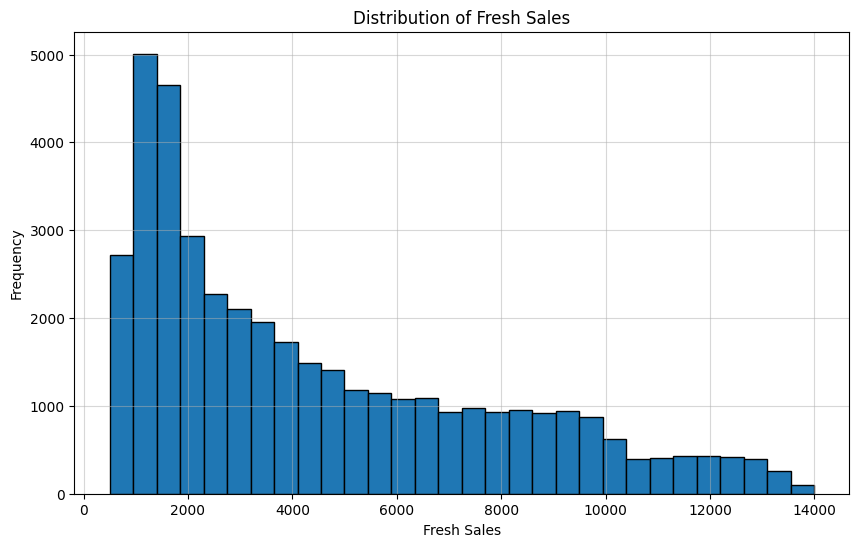

In [ ]:
# Create histogram
plt.figure(figsize=(10, 6))  # Adjust figure size if needed
plt.hist(test['fresh_sales'], bins=30, edgecolor='black')

# Customize the plot
plt.title("Distribution of Fresh Sales")
plt.xlabel("Fresh Sales")
plt.ylabel("Frequency")
plt.grid(True, alpha=0.5)  # Add a grid for better readability

# Display the histogram
plt.show()

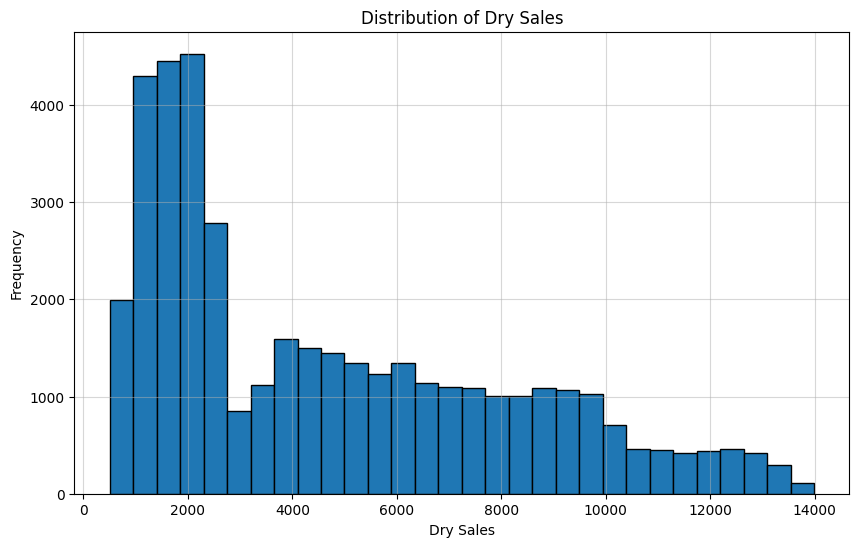

In [ ]:
# Create histogram
plt.figure(figsize=(10, 6))  # Adjust figure size if needed
plt.hist(test['dry_sales'], bins=30, edgecolor='black')

# Customize the plot
plt.title("Distribution of Dry Sales")
plt.xlabel("Dry Sales")
plt.ylabel("Frequency")
plt.grid(True, alpha=0.5)  # Add a grid for better readability

# Display the histogram
plt.show()

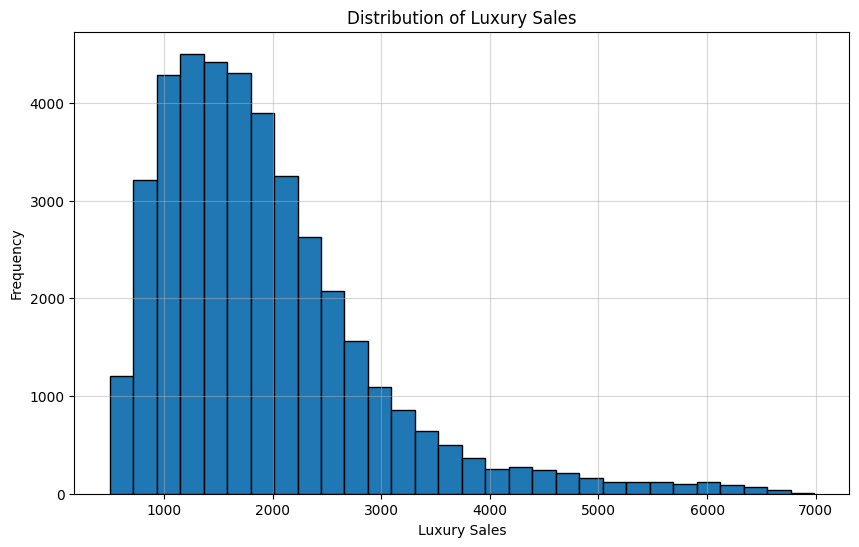

In [ ]:
# Create histogram
plt.figure(figsize=(10, 6))  # Adjust figure size if needed
plt.hist(test['luxury_sales'], bins=30, edgecolor='black')

# Customize the plot
plt.title("Distribution of Luxury Sales")
plt.xlabel("Luxury Sales")
plt.ylabel("Frequency")
plt.grid(True, alpha=0.5)  # Add a grid for better readability

# Display the histogram
plt.show()

In [ ]:
#Box plots of luxury sales
fig2 = px.box(test, y="luxury_sales", title="Box Plot of Luxury Sales")
fig2.show()

In [ ]:
#Box plots of dry sales
fig1 = px.box(test, y="dry_sales", title="Box Plot of Dry Sales")
fig1.show()

In [ ]:
#Box plots of fresh sales
fig3 = px.box(test, y="fresh_sales", title="Box Plot of Fresh Sales")
fig3.show()

Multivariate Analysis

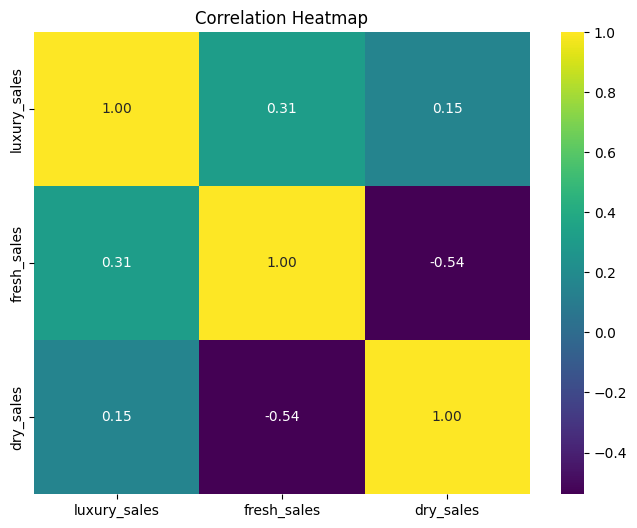

In [ ]:
# Calculate correlation matrix
corr_matrix = test[['luxury_sales', 'fresh_sales', 'dry_sales']].corr()

# Create heatmap
plt.figure(figsize=(8, 6))  # Adjust figure size if needed
sns.heatmap(corr_matrix, annot=True, cmap='viridis', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

In [ ]:
#Sales by City
city_sales = test.groupby('outlet_city')[['luxury_sales', 'fresh_sales', 'dry_sales']].sum().reset_index()
fig = px.bar(city_sales, x='outlet_city', y=['luxury_sales', 'fresh_sales', 'dry_sales'],
             title="Sales by City", barmode='group')
fig.show()

Data Preprocessing

In [ ]:
#Importing the libraries
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder, OneHotEncoder
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
import os
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.manifold import TSNE
import umap

In [ ]:
#Mount google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#File path
df = pd.read_csv("/content/drive/MyDrive/test.csv")

In [ ]:
# Data Understanding
print("Initial Data Info:")
print(df.info())

Initial Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40749 entries, 0 to 40748
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Customer_ID   40749 non-null  int64 
 1   outlet_city   40749 non-null  object
 2   luxury_sales  40749 non-null  object
 3   fresh_sales   40749 non-null  object
 4   dry_sales     40749 non-null  object
dtypes: int64(1), object(4)
memory usage: 1.6+ MB
None


In [ ]:
#Describe
df.describe(include='all')

Customer_ID outlet_city luxury_sales fresh_sales dry_sales
count   40749.000000       40749        40749       40749     40749
unique           NaN          27        33183       36100     35771
top              NaN      Jaffna       1801.8      1161.6    2694.6
freq             NaN        2226            7           5         5
mean    20375.000000         NaN          NaN         NaN       NaN
std     11763.367396         NaN          NaN         NaN       NaN
min         1.000000         NaN          NaN         NaN       NaN
25%     10188.000000         NaN          NaN         NaN       NaN
50%     20375.000000         NaN          NaN         NaN       NaN
75%     30562.000000         NaN          NaN         NaN       NaN
max     40749.000000         NaN          NaN         NaN       NaN

In [ ]:
#Shape of the dataset
df.shape

(40749, 5)

In [ ]:
#Check for duplicates
num_duplicates = df.duplicated().sum()
print(f"Number of duplicate rows: {num_duplicates}")

Number of duplicate rows: 0


In [ ]:
# Removing Duplicates
df.drop_duplicates(inplace=True)

In [ ]:
# Check for missing values
missing_values = df.isnull().sum()
print("Missing Values per Column:")
print(missing_values)

Missing Values per Column:
Customer_ID     0
outlet_city     0
luxury_sales    0
fresh_sales     0
dry_sales       0
dtype: int64


In [ ]:
# Remove rows with any missing values
df.dropna(inplace=True)

In [ ]:
# Handle outliers using IQR
def remove_outliers(df, columns):
    for col in columns:
        if col in df.columns and pd.api.types.is_numeric_dtype(df[col]):
            Q1, Q3 = df[col].quantile(0.25), df[col].quantile(0.75)
            IQR = Q3 - Q1
            lower, upper = Q1 - 1.5 * IQR, Q3 + 1.5 * IQR
            df = df[(df[col] >= lower) & (df[col] <= upper)]
    return df

# Apply outlier removal to numeric columns
numeric_columns = ["luxury_sales", "fresh_sales", "dry_sales","cluster_category"]

Data Transformation

In [ ]:
# Convert relevant columns to float
columns_to_convert = ["luxury_sales", "fresh_sales", "dry_sales"]  # Adjust as needed
df[columns_to_convert] = df[columns_to_convert].apply(pd.to_numeric, errors='coerce')

In [ ]:
# Normalization for train_df
scaler = MinMaxScaler()
sales_columns = ["luxury_sales", "fresh_sales", "dry_sales"]

# Replace 'train_cleaned' with 'df'
df[sales_columns] = scaler.fit_transform(df[sales_columns])
print(df)

       Customer_ID outlet_city  luxury_sales  fresh_sales  dry_sales
0            33574  batticaloa      0.337047     0.228362   0.892316
1            10089  batticaloa      0.187631     0.153840   0.663203
2            38329  batticaloa      0.054472     0.054980   0.348515
3            11376  batticaloa      0.175381     0.134894   0.651052
4            12410  batticaloa      0.083007     0.075464   0.365816
...            ...         ...           ...          ...        ...
40744        33698     Wattala      0.526717     0.271287   0.253220
40745         4185     Wattala      0.414986     0.185543   0.192543
40746        28664     Wattala      0.514707     0.255743        NaN
40747        11874     Wattala      0.587980     0.272901   0.282673
40748        11431     Wattala      0.572312     0.275059   0.275140

[40749 rows x 5 columns]


In [ ]:
# Encode the "outlet_city" column directly
label_encoder = LabelEncoder()

df["outlet_city"] = label_encoder.fit_transform(df["outlet_city"])

EDA after part

In [ ]:
!pip install openpyxl
import openpyxl

df.to_excel('Testpreprocessed_data.xlsx', index=False)

In [ ]:
#read the csv
df = pd.read_excel("/content/Testpreprocessed_data.xlsx")
df

Customer_ID  outlet_city  luxury_sales  fresh_sales  dry_sales
0            33574           25      0.337047     0.228362   0.892316
1            10089           25      0.187631     0.153840   0.663203
2            38329           25      0.054472     0.054980   0.348515
3            11376           25      0.175381     0.134894   0.651052
4            12410           25      0.083007     0.075464   0.365816
...            ...          ...           ...          ...        ...
40744        33698           24      0.526717     0.271287   0.253220
40745         4185           24      0.414986     0.185543   0.192543
40746        28664           24      0.514707     0.255743        NaN
40747        11874           24      0.587980     0.272901   0.282673
40748        11431           24      0.572312     0.275059   0.275140

[40749 rows x 5 columns]

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40749 entries, 0 to 40748
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Customer_ID   40749 non-null  int64  
 1   outlet_city   40749 non-null  int64  
 2   luxury_sales  40747 non-null  float64
 3   fresh_sales   40748 non-null  float64
 4   dry_sales     40748 non-null  float64
dtypes: float64(3), int64(2)
memory usage: 1.6 MB


In [ ]:
df.describe(include='all')

Customer_ID   outlet_city  luxury_sales   fresh_sales     dry_sales
count  40749.000000  40749.000000  40747.000000  40748.000000  40748.000000
mean   20375.000000     11.624678      0.219947      0.292154      0.310680
std    11763.367396      7.372958      0.154790      0.248200      0.252882
min        1.000000      0.000000      0.000000      0.000000      0.000000
25%    10188.000000      6.000000      0.110966      0.082939      0.096271
50%    20375.000000     11.000000      0.188273      0.212580      0.241274
75%    30562.000000     18.000000      0.284562      0.459192      0.495423
max    40749.000000     26.000000      1.000000      1.000000      1.000000

In [ ]:
df.shape

(40749, 5)

In [ ]:
unique_inputs_train = df.apply(pd.Series.unique)
print(unique_inputs_train)

Customer_ID     [33574, 10089, 38329, 11376, 12410, 826, 10364...
outlet_city     [25, 1, 2, 3, 0, 4, 5, 6, 7, 8, 9, 26, 10, 11,...
luxury_sales    [0.3370471175123558, 0.1876311711142124, 0.054...
fresh_sales     [0.2283620357471026, 0.1538399976287163, 0.054...
dry_sales       [0.8923164746526696, 0.6632030010527408, 0.348...
dtype: object


In [ ]:
df.duplicated().sum()

np.int64(0)

In [ ]:
df.isnull().sum()

Customer_ID     0
outlet_city     0
luxury_sales    2
fresh_sales     1
dry_sales       1
dtype: int64

Univariate Analysis

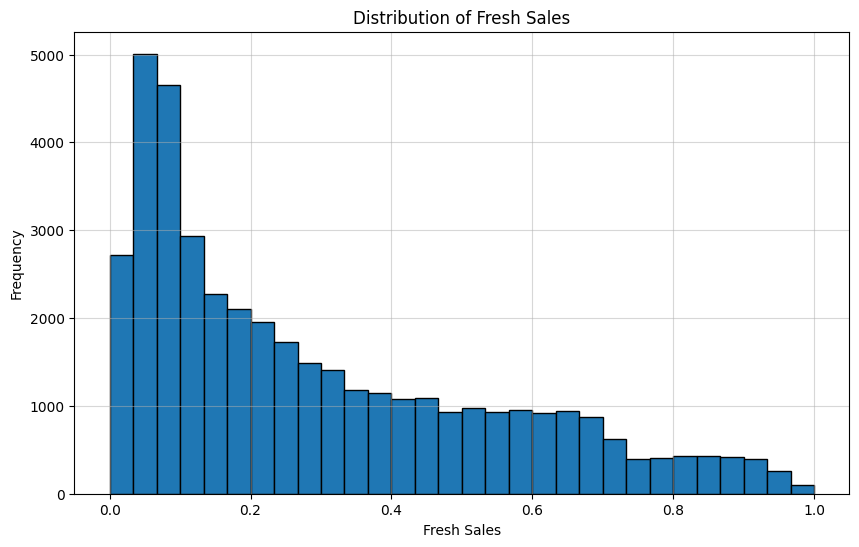

In [ ]:
# Create histogram
plt.figure(figsize=(10, 6))  # Adjust figure size if needed
plt.hist(df['fresh_sales'], bins=30, edgecolor='black')

# Customize the plot
plt.title("Distribution of Fresh Sales")
plt.xlabel("Fresh Sales")
plt.ylabel("Frequency")
plt.grid(True, alpha=0.5)  # Add a grid for better readability

# Display the histogram
plt.show()

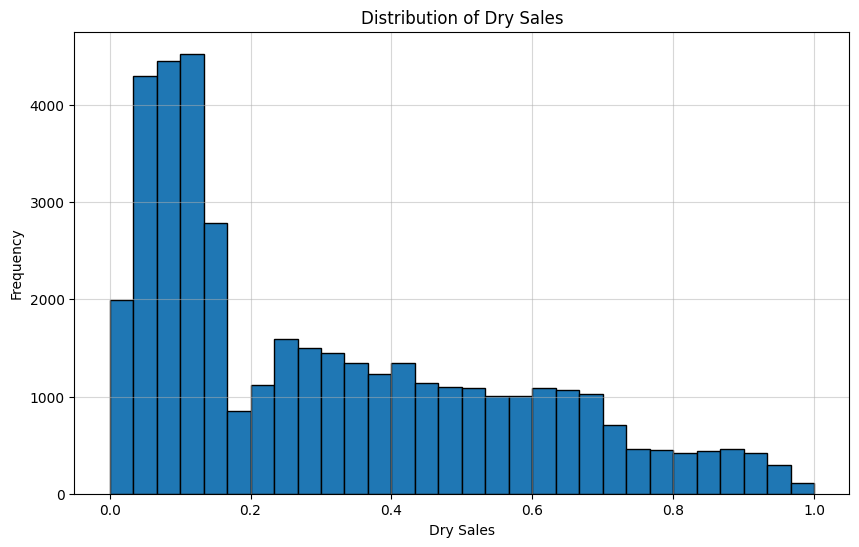

In [ ]:
# Create histogram
plt.figure(figsize=(10, 6))  # Adjust figure size if needed
plt.hist(df['dry_sales'], bins=30, edgecolor='black')

# Customize the plot
plt.title("Distribution of Dry Sales")
plt.xlabel("Dry Sales")
plt.ylabel("Frequency")
plt.grid(True, alpha=0.5)  # Add a grid for better readability

# Display the histogram
plt.show()

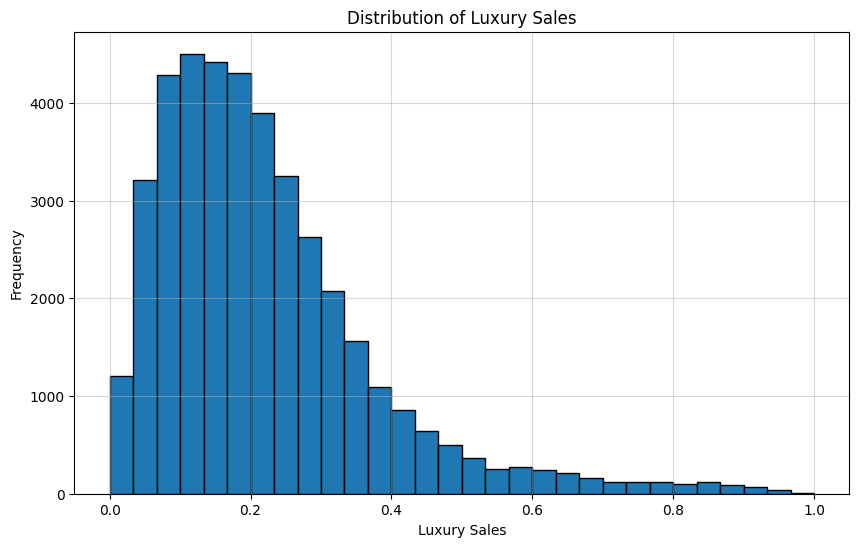

In [ ]:
# Create histogram
plt.figure(figsize=(10, 6))
plt.hist(df['luxury_sales'], bins=30, edgecolor='black')

# Customize the plot
plt.title("Distribution of Luxury Sales")
plt.xlabel("Luxury Sales")
plt.ylabel("Frequency")
plt.grid(True, alpha=0.5)
# Display the histogram
plt.show()

In [ ]:
#Box plots of dry sales
fig1 = px.box(df, y="dry_sales", title="Box Plot of Dry Sales")
fig1.show()

In [ ]:
#Box plots of luxury sales
fig2 = px.box(df, y="luxury_sales", title="Box Plot of Luxury Sales")
fig2.show()

In [ ]:
#Box plots of dry sales
fig1 = px.box(df, y="dry_sales", title="Box Plot of Dry Sales")
fig1.show()

In [ ]:
#Box plots of fresh sales
fig3 = px.box(df, y="fresh_sales", title="Box Plot of Fresh Sales")
fig3.show()

Multivariate Analysis

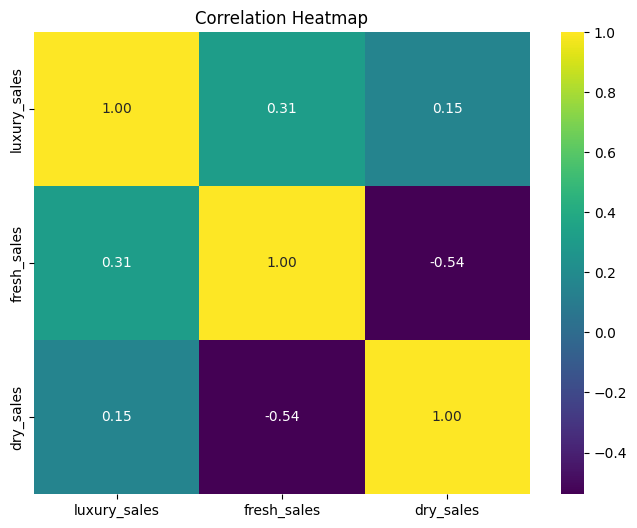

In [ ]:
# Calculate correlation matrix
corr_matrix = df[['luxury_sales', 'fresh_sales', 'dry_sales']].corr()

# Create heatmap
plt.figure(figsize=(8, 6))  # Adjust figure size if needed
sns.heatmap(corr_matrix, annot=True, cmap='viridis', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

In [ ]:
#Sales by City
city_sales = df.groupby('outlet_city')[['luxury_sales', 'fresh_sales', 'dry_sales']].sum().reset_index()
fig = px.bar(city_sales, x='outlet_city', y=['luxury_sales', 'fresh_sales', 'dry_sales'],
             title="Sales by City", barmode='group')
fig.show()